In [1]:
#import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import emachine as EM

In [2]:
np.random.seed(0)

In [3]:
s0 = np.loadtxt('../MNIST_data/mnist_train.csv',delimiter=',')

In [4]:
seq = s0[:,1:] 
label = s0[:,0]
print(seq.shape,label.shape)

(60000, 784) (60000,)


In [19]:
# select only 1 digit
digit = 8
i = label == digit
label1 = label[i]
seq1 = seq[i]
print(digit,seq1.shape,label1.shape)

# convert to binary
seq1 = np.sign(seq1-1.5)

8 (5851, 784) (5851,)


In [20]:
# combine pixels to reduce the size of image
n = seq1.shape[0]
m = int(np.sqrt(seq1.shape[1]))
seq2 = seq1.reshape(n,m,m) # recover the image
print(seq2.shape)

r = 2 # reduced fraction

m2 = int(m/float(r))
seq2_sum = np.zeros((n,m2,m2))
i_list = np.linspace(0,m-r,m2).astype(int)
for t in range(n):
    for i2,i in enumerate(i_list):
        for j2,j in enumerate(i_list):
            seq2_sum[t,i2,j2] = np.sum(seq2[t,i:i+r,j:j+r])

(5851, 28, 28)


(5851, 14, 14)


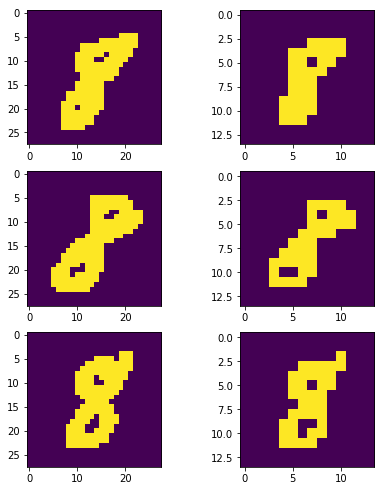

In [22]:
seq_reduced = np.sign(seq2_sum - 1.5)
print(seq_reduced.shape)

nx,ny = 2,3
nfig = nx*ny
fig, ax = plt.subplots(ny,nx,figsize=(nx*3.5,ny*2.8))
for i in range(ny):
    ax[i,0].imshow(seq2[i],interpolation='nearest')
    ax[i,1].imshow(seq_reduced[i],interpolation='nearest')